In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Dataset

In [28]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [29]:
train_df.shape

(60000, 785)

In [30]:
test_df.shape

(10000, 785)

In [31]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
y_train = train_df.iloc[:,0].to_numpy()

In [11]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [12]:
y_test = test_df.iloc[:,0].to_numpy()

### Visualization

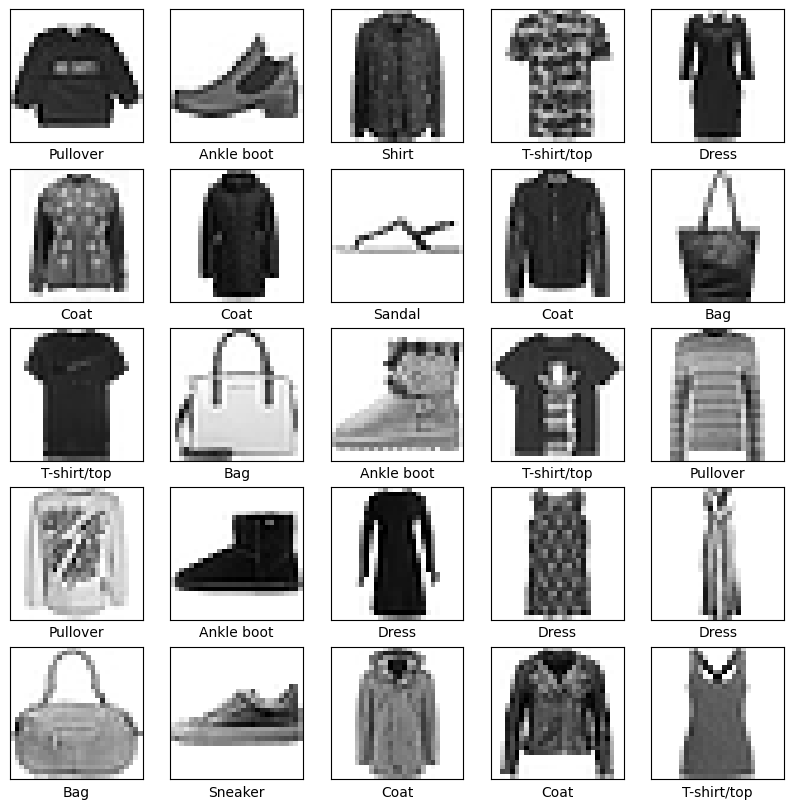

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model Building

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.layers import BatchNormalization


In [15]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


C:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         346,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 356ms/step - accuracy: 0.5329 - loss: 1.3861 - val_accuracy: 0.7980 - val_loss: 0.5734
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.8162 - loss: 0.5202 - val_accuracy: 0.8340 - val_loss: 0.4684
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.8420 - loss: 0.4441 - val_accuracy: 0.8527 - val_loss: 0.4243
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.8564 - loss: 0.4077 - val_accuracy: 0.8667 - val_loss: 0.3862
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.8656 - loss: 0.3768 - val_accuracy: 0.8720 - val_loss: 0.3699
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.8734 - loss: 0.3565 - val_accuracy: 0.8800 - val_loss: 0.3534
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8796 - loss: 0.3473 - val_accuracy: 0.8830 - val_loss: 0.3449
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.8827 - loss: 0.3357 - val_accu

In [17]:
evaluation = model.evaluate(x_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9470 - loss: 0.1529


In [18]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.944683313369751


In [19]:
y_probas = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [20]:
y_pred = y_probas.argmax(axis=-1)

In [21]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

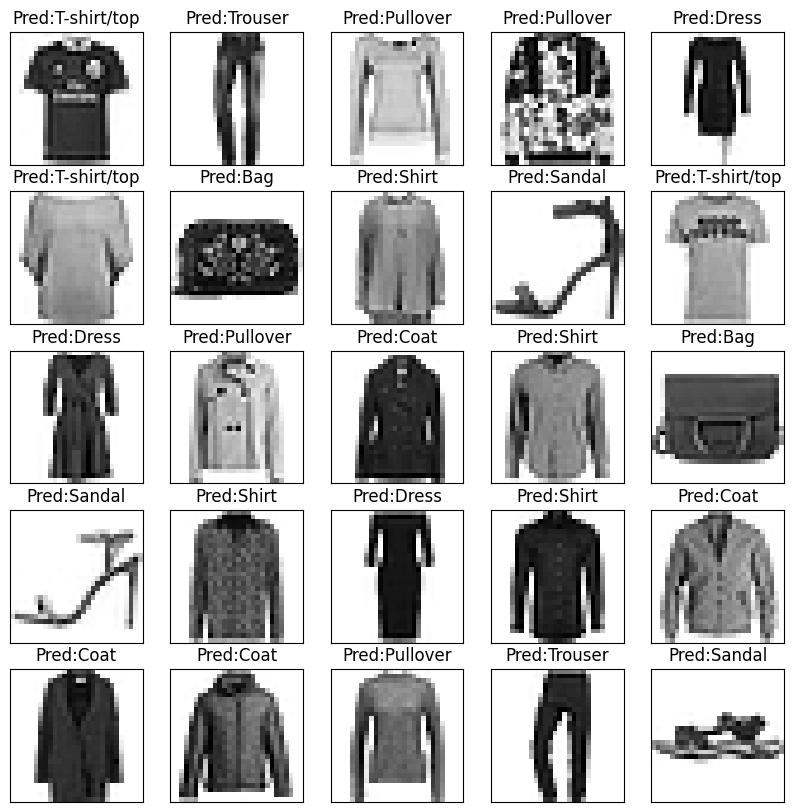

In [22]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    # plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [26]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.83      0.90      0.86      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.88      0.87      0.87      1000
     class 3       0.93      0.92      0.93      1000
     class 4       0.85      0.90      0.87      1000
     class 5       0.99      0.98      0.98      1000
     class 6       0.82      0.71      0.76      1000
     class 7       0.95      0.98      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

